In [1]:
import pandas as pd
import numpy as np
import time
import os
import collections
from XFLib import *
# class time_est():
#     def __init__(self, total_len):
#         self.t_start = time.time()
#         self.total_len = total_len
#         self.count = 0
#         self.t_ref = time.time()
    
#     def check(self,no_of_check=1,info=""):
#         self.count += no_of_check
#         if time.time() - self.t_ref > 1:
#             t_used = time.time() - self.t_start
#             t_total = t_used * self.total_len / self.count
#             t_remain = t_total - t_used
#             process_bar = "|"
#             for i in range(40):
#                 if (i/40) < (self.count/self.total_len):
#                     process_bar += "█"
#                 else:
#                     process_bar += " "
#             process_bar += "|"
#             print("\r" + (str(info) + "  {:.2f}% ({}/{})\t".format(self.count * 100/self.total_len, self.count,self.total_len)) + str(process_bar).ljust(45) + "Used: {:02.0f}:{:02.0f}:{:02.0f}".format(int(t_used/3600), int(t_used/60)%60, t_used % 60).ljust(16) + "ETA: {:02.0f}:{:02.0f}:{:02.0f}".format(int(t_remain/3600), int(t_remain/60)%60, t_remain % 60),end="")
#             self.t_ref = time.time()
#         if self.count == self.total_len:
#             t_used = time.time() - self.t_start
#             print("\r" + str(info) + "  Finished in " +"{:02.0f}:{:02.0f}:{:02.0f}".format(int(t_used/3600), int(t_used/60)%60, t_used % 60).ljust(100))

In [2]:
path = 'i2v_sep/'
file = os.listdir(path)

In [3]:
top_artist = np.load('eval/artist.npy')

In [4]:
# customer_id_dict = collections.defaultdict()
# est = time_est(len(file))
# for i in file:
#     df = pd.read_csv(path+i, low_memory = False)
#     df = df.drop('Unnamed: 0',1)
#     df = df[df['day']!='day']
#     df['hour'] = [int(x) for x in df['hour']]
#     df['minute'] = [int(x) for x in df['minute']]
#     df = df.sort_values(['hour','minute'])
#     df = df[df['artist_name'].isin(top_artist)]
#     df_np = np.array(df)
#     for customer_id, artist_name, _, _, _ in df_np:
#         try:
#             customer_id_dict[customer_id].append(artist_name)
#         except:
#             customer_id_dict[customer_id] = []
#             customer_id_dict[customer_id].append(artist_name)
#     est.check()

In [5]:
# len(df['artist_name'].value_counts())

In [6]:
# np.save('eval/i2v_cus.npy', customer_id_dict)

In [7]:
# artist_info = list(customer_id_dict.values())

In [8]:
# len(artist_info)

In [9]:
import gensim

In [10]:
# model = gensim.models.Word2Vec(artist_info, size=100, window=5, min_count=5, workers=4)

In [11]:
# model.save('i2v/i2v_100')

In [12]:
# model.most_similar('Linkin Park')

In [13]:
model = gensim.models.Word2Vec.load('i2v/i2v_100')

In [14]:
genres = np.load('eval/top100artistgenres.npy').item()

In [15]:
ip = 'Linkin Park'

In [16]:
related = list(model.most_similar(ip,topn=10))

In [17]:
related = [x[0] for x in related]

In [18]:
related

['Skillet',
 'Of Mice & Men',
 'Disturbed',
 'Asking Alexandria',
 'Enya',
 'Iron Maiden',
 'Avenged Sevenfold',
 'Bring Me The Horizon',
 'Pendulum',
 'Lupe Fiasco']

In [19]:
ip_gen = genres[ip]

count = 0
for j in related:
    for i in genres[j]:
        if i in ip_gen:
            count+=1
            break
print(count/10)

0.8


In [20]:
count = 0
for ip in top_artist:
    related = list(model.most_similar(ip))
    related = [x[0] for x in related]
    ip_gen = genres[ip]
    for j in related:
        for i in genres[j]:
            if i in ip_gen:
                count+=1
                break

In [21]:
count/1000

0.514

In [22]:
len(top_artist)

100

In [23]:
model.most_similar(ip,topn=3)

[('Asking Alexandria', 0.6280969381332397),
 ('Of Mice & Men', 0.6081412434577942),
 ('Bring Me The Horizon', 0.6065623760223389)]

In [24]:
score_list = []

for num_pred in range(1,100):
    count = 0
    for ip in top_artist:
        related = list(model.most_similar(ip,topn=num_pred))
        related = [x[0] for x in related]
        ip_gen = genres[ip]
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    count+=1
                    break
    score_list.append(count/(100*num_pred))

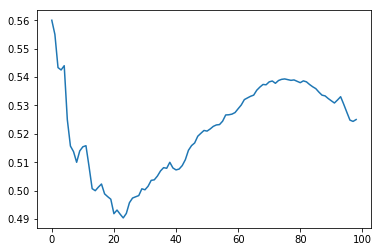

In [25]:
import matplotlib.pyplot as plt

plt.plot(score_list)
plt.show()

In [26]:
np.save('eval/i2v_eval.npy',score_list)

In [27]:
score_list = []

for num_pred in range(1,100):
    count = 0
    for ip in top_artist:
        related = list(model.most_similar(ip,topn=num_pred))
        related = [x[0] for x in related]
        ip_gen = genres[ip]
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    count+=1
                    break
    score_list.append(count/(100*num_pred))

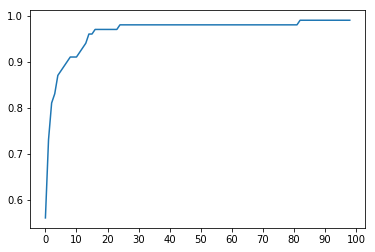

In [28]:
score_list = []

for num_pred in range(1,100):
    count = 0
    for ip in top_artist:
        related = list(model.most_similar(ip,topn=num_pred))
        related = [x[0] for x in related]
        ip_gen = genres[ip]
        correct = 0
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    correct = 1
        count += correct
    score_list.append(count/(100))
plt.xticks(np.arange(0, 101, 10))
plt.plot(score_list)
plt.show()

In [29]:
np.save('./eval/i2v_acc.npy',score_list)